### Multi Linear Regression - Toyota Corolla

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import mean_squared_error
from collections import Counter
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
toyota = pd.read_csv('ToyotaCorolla.csv',encoding= 'unicode_escape')

In [3]:
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
toyota1= toyota.iloc[:,[2,3,6,8,12,13,15,16,17]]

In [5]:
df = toyota1.rename(columns={"Age_08_04":"Age"})

In [6]:
df.count()

Price            1436
Age              1436
KM               1436
HP               1436
cc               1436
Doors            1436
Gears            1436
Quarterly_Tax    1436
Weight           1436
dtype: int64

In [7]:
df.describe()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


### Data Processing and Visualization

In [8]:
df.isnull().sum()

Price            0
Age              0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [9]:
corr = df.corr()

<AxesSubplot:>

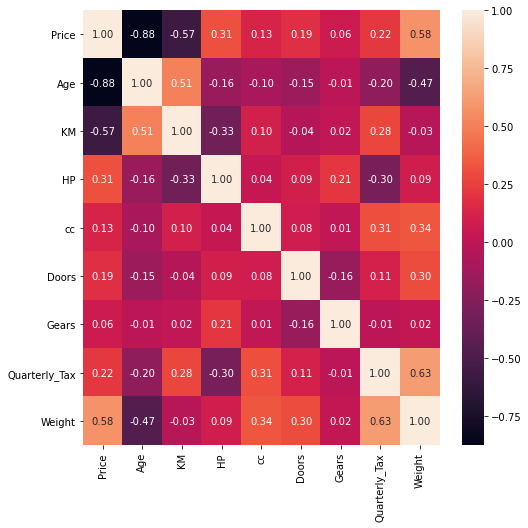

In [10]:
plt.figure(figsize=(8,8))
sns.heatmap(corr, annot=True,fmt = ".2f")

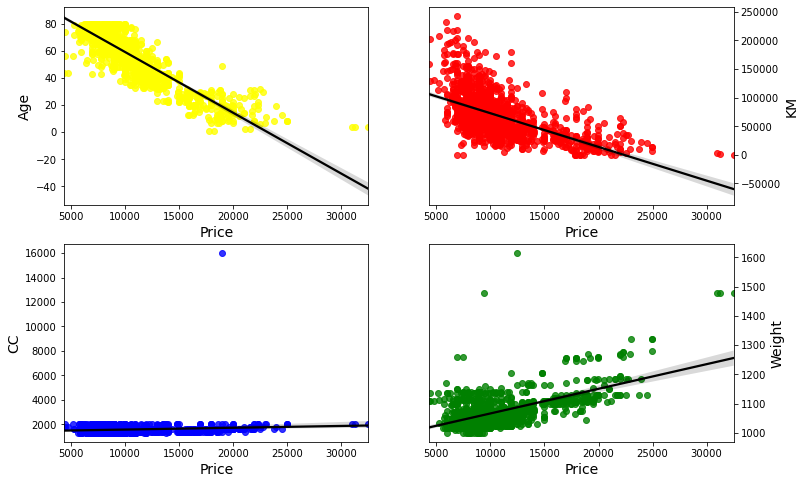

In [11]:
# plot regplots  for Age, KM, CC & HP against Price
f, axes = plt.subplots(2,2, figsize=(12,8))
# Age Vs Price
sns.regplot(x = 'Price', y = 'Age', data = df, ax = axes[0,0], scatter_kws={"color": "yellow"}, line_kws={"color": "black"})
axes[0,0].set_xlabel('Price', fontsize = 14)
axes[0,0].set_ylabel('Age', fontsize=14)
axes[0,0].yaxis.tick_left()

# KM Vs Price
sns.regplot(x = 'Price', y = 'KM', data = df, ax = axes[0,1], scatter_kws={"color": "red"}, line_kws={"color": "black"})
axes[0,1].set_xlabel('Price', fontsize = 14)
axes[0,1].set_ylabel('KM', fontsize=14)
axes[0,1].yaxis.set_label_position("right")
axes[0,1].yaxis.tick_right()

# CC Vs Price
sns.regplot(x = 'Price', y = 'cc', data = df, ax = axes[1,0], scatter_kws={"color": "blue"}, line_kws={"color": "black"})
axes[1,0].set_xlabel('Price', fontsize = 14)
axes[1,0].set_ylabel('CC', fontsize=14)
axes[1,0].yaxis.tick_left()

# Weight Vs Price
sns.regplot(x = 'Price', y = 'Weight', data = df, ax = axes[1,1], scatter_kws={"color": "green"}, line_kws={"color": "black"})
axes[1,1].set_xlabel('Price', fontsize = 14)
axes[1,1].set_ylabel('Weight', fontsize=14)
axes[1,1].yaxis.set_label_position("right")
axes[1,1].yaxis.tick_right()

plt.show()

In [12]:
# Create the clasiification.
df = pd.get_dummies(df)

In [13]:
df.head()

,Price,Age,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


### Multi Linear Regression

In [15]:
# Separating the independent and dependent variable.
X_lr = df.drop('Price', axis = 1).values
y_lr = df["Price"].values.reshape(-1,1)

In [16]:
X_lr, X_lr, y_lr, y_lr = train_test_split(X_lr,y_lr, test_size = 0.25, random_state = 4)

In [17]:
print('Train Dataset : ', X_lr.shape, y_lr.shape)
print('Test Dataset : ', X_lr.shape, y_lr.shape)

Train Dataset :  (359, 8) (359, 1)
Test Dataset :  (359, 8) (359, 1)


In [18]:
multi_lreg = LinearRegression()
multi_lreg.fit(X_lr, y_lr)

LinearRegression()

In [19]:
print('Intercept : ', multi_lreg.intercept_)
print('Slope : ', multi_lreg.coef_)

Intercept :  [-3596.99699554]
Slope :  [[-1.23463386e+02 -1.91089207e-02  4.20535431e+01 -2.25838706e+00
  -1.43762492e+01  2.92873453e+02  1.17336247e+01  1.81493782e+01]]


In [20]:
#Use the model to predict the test dataset.
y_mlreg_pred_test = multi_lreg.predict(X_lr)

In [21]:
# Use the model to predict the train dataset.
y_mlreg_pred_train = multi_lreg.predict(X_lr)

In [22]:
# Have a look at the predicted & actual values.
print(y_mlreg_pred_test[0:5])
print(y_lr[0:5])

print(y_mlreg_pred_train[0:5])
print(y_lr[0:5])

[[ 7871.92740459]
 [10235.02437556]
 [ 9779.53765687]
 [11887.69548261]
 [ 8878.4185755 ]]
[[8950]
 [9850]
 [8250]
 [9750]
 [9250]]
[[ 7871.92740459]
 [10235.02437556]
 [ 9779.53765687]
 [11887.69548261]
 [ 8878.4185755 ]]
[[8950]
 [9850]
 [8250]
 [9750]
 [9250]]


#### R2 Score

In [23]:
# Calculate the eualuation metrics of the model.
r2_score_mlreg_train = r2_score(y_mlreg_pred_train, y_lr)
r2_score_mlreg_test = r2_score(y_mlreg_pred_test, y_lr)
rmse_mlreg = np.sqrt(mean_squared_error(y_mlreg_pred_test, y_lr)**2)
print('r2_ score for train dataset for multi linear reg : ', r2_score_mlreg_train)
print('r2_ score for test dataset for multi linear reg : ', r2_score_mlreg_test)
print('root mean squared error for multi linear reg : ', rmse_mlreg)

r2_ score for train dataset for multi linear reg :  0.8671239750430744
r2_ score for test dataset for multi linear reg :  0.8671239750430744
root mean squared error for multi linear reg :  1725837.2553617805


#### Ridge Regression

In [24]:
# Separating the independent and dependent variable.
X_ridge_reg = df.drop('Price', axis = 1).values
y_ridge_reg = df["Price"].values.reshape(-1,1)

In [25]:
# Create train test dataset
X_train_ridge_reg, X_test_ridge_reg, y_train_ridge_reg, y_test_ridge_reg = train_test_split(X_ridge_reg,y_ridge_reg, test_size = 0.25, random_state = 4)
print('Train Dataset : ', X_train_ridge_reg.shape, y_train_ridge_reg.shape)
print('Test Dataset : ', X_test_ridge_reg.shape, y_test_ridge_reg.shape)

Train Dataset :  (1077, 8) (1077, 1)
Test Dataset :  (359, 8) (359, 1)


In [26]:
from sklearn.linear_model import Ridge

In [27]:
## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train_ridge_reg,y_train_ridge_reg)

Ridge(alpha=0.05, normalize=True)

In [28]:
# Use the model to predict the test dataset.
y_ridgereg_pred_test = ridgeReg.predict(X_test_ridge_reg)

In [29]:
# Use the model to predict the train dataset.
y_ridgereg_pred_train = ridgeReg.predict(X_train_ridge_reg)

#### R2 Score

In [30]:
# Calculate the eualuation metrics of the model.
r2_score_ridgereg_train = r2_score(y_ridgereg_pred_train, y_train_ridge_reg)
r2_score_ridgereg_test = r2_score(y_ridgereg_pred_test, y_test_ridge_reg)
rmse_ridgereg = np.sqrt(mean_squared_error(y_ridgereg_pred_test, y_test_ridge_reg)**2)
print('r2_ score for train dataset for multi linear reg : ', r2_score_ridgereg_train)
print('r2_ score for test dataset for multi linear reg : ', r2_score_ridgereg_test)
print('root mean squared error for multi linear reg : ', rmse_ridgereg)

r2_ score for train dataset for multi linear reg :  0.8242210208620694
r2_ score for test dataset for multi linear reg :  0.837913958173101
root mean squared error for multi linear reg :  1877891.8158316377


#### Lasso Regression

In [31]:
from sklearn.linear_model import Lasso
## training the model

lassoReg = Lasso(alpha=0.3, normalize=True)

lassoReg.fit(X_train_ridge_reg,y_train_ridge_reg)

Lasso(alpha=0.3, normalize=True)

In [32]:
# Use the model to predict the test dataset.
y_lassoreg_pred_test = lassoReg.predict(X_test_ridge_reg)

In [33]:
# Use the model to predict the train dataset.
y_lassoreg_pred_train = lassoReg.predict(X_train_ridge_reg)

#### R2 Score

In [34]:
r2_score_lassoreg_train = r2_score(y_lassoreg_pred_train, y_train_ridge_reg)
r2_score_lassoreg_test = r2_score(y_lassoreg_pred_test, y_test_ridge_reg)
rmse_lassoreg = np.sqrt(mean_squared_error(y_lassoreg_pred_test, y_test_ridge_reg)**2)
print('r2_ score for train dataset for multi linear reg : ', r2_score_lassoreg_train)
print('r2_ score for test dataset for multi linear reg : ', r2_score_lassoreg_test)
print('root mean squared error for multi linear reg : ', rmse_lassoreg)

r2_ score for train dataset for multi linear reg :  0.833985185084513
r2_ score for test dataset for multi linear reg :  0.8474175130421315
root mean squared error for multi linear reg :  1859471.861727184


In [35]:
Models = [('Multiplt Linear Regression', r2_score_mlreg_train, r2_score_mlreg_test, rmse_mlreg),
          ('Ridge Regression', r2_score_ridgereg_train, r2_score_ridgereg_test, rmse_ridgereg),
          ('Lasso Regression', r2_score_lassoreg_train, r2_score_lassoreg_test, rmse_lassoreg)]

In [36]:
predict_all = pd.DataFrame(data = Models, columns = ['Models', 'r2_score Training', 'r2_score Testing', 'RMSE'])
predict_all

,Models,r2_score Training,r2_score Testing,RMSE
0,Multiplt Linear Regression,0.867124,0.867124,1.725837e+06
1,Ridge Regression,0.824221,0.837914,1.877892e+06
2,Lasso Regression,0.833985,0.847418,1.859472e+06


#### Visualization

(0.0, 1.0)

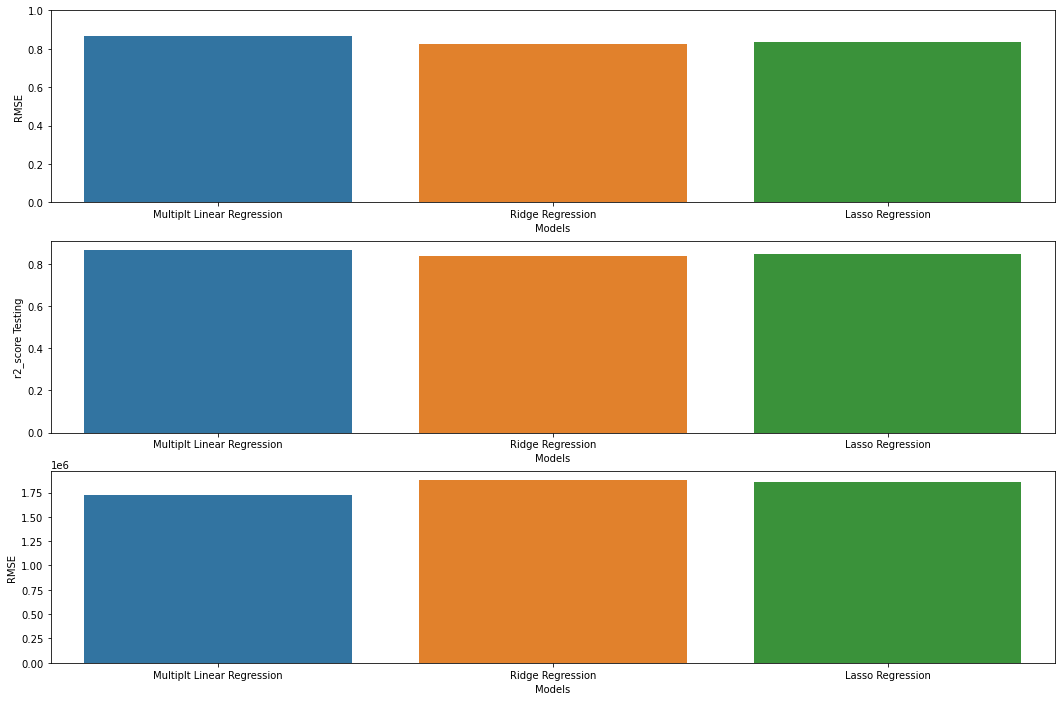

In [37]:
f, axes = plt.subplots(3,1, figsize=(18,12))

sns.barplot(x='Models', y='r2_score Training', data = predict_all, ax = axes[0])
axes[0].set_xlabel('Models')
axes[0].set_ylabel('r2_score Training')
axes[0].set_ylim(0,1.0)

sns.barplot(x='Models', y='r2_score Testing', data = predict_all, ax = axes[1])
axes[0].set_xlabel('Models')
axes[0].set_ylabel('r2_score Testing')
axes[0].set_ylim(0,1.0)

sns.barplot(x='Models', y='RMSE', data = predict_all, ax = axes[2])
axes[0].set_xlabel('Models')
axes[0].set_ylabel('RMSE')
axes[0].set_ylim(0,1.0)